In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


In [3]:
numerical = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
catagorical = ['Sex']

In [4]:

data = pd.read_csv('abalone/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])
print(data.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


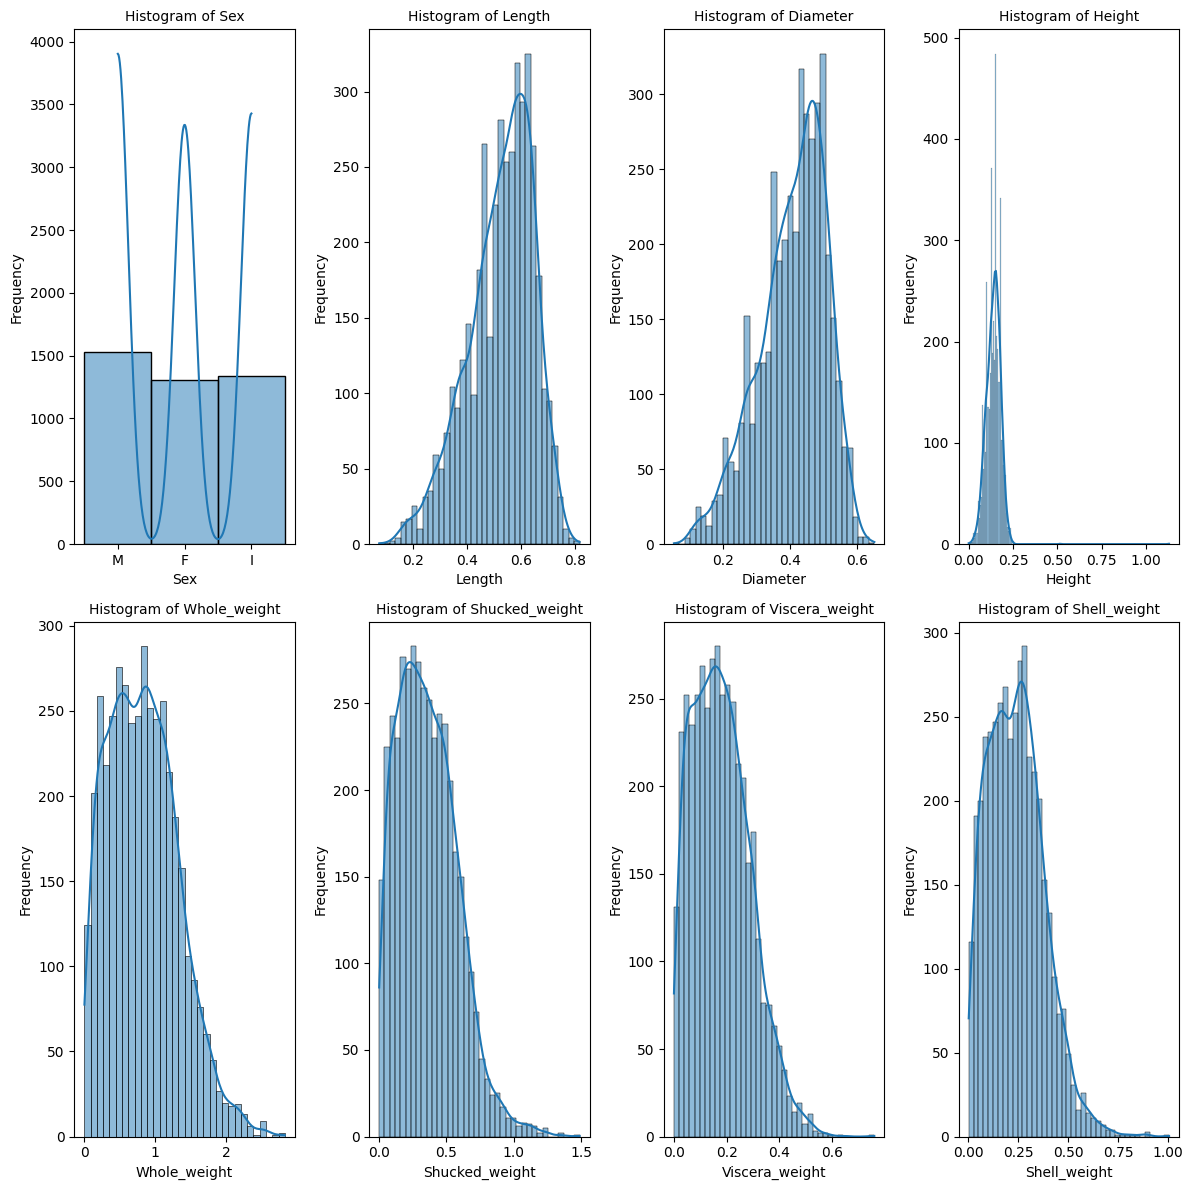

In [9]:
plt.figure(figsize=(12, 12))
for i in range(len(data.columns[:-1])):
    col = data.columns[i]
    plt.subplot(2, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}', fontdict={'fontsize': 10})
plt.tight_layout()
plt.show()
    
    

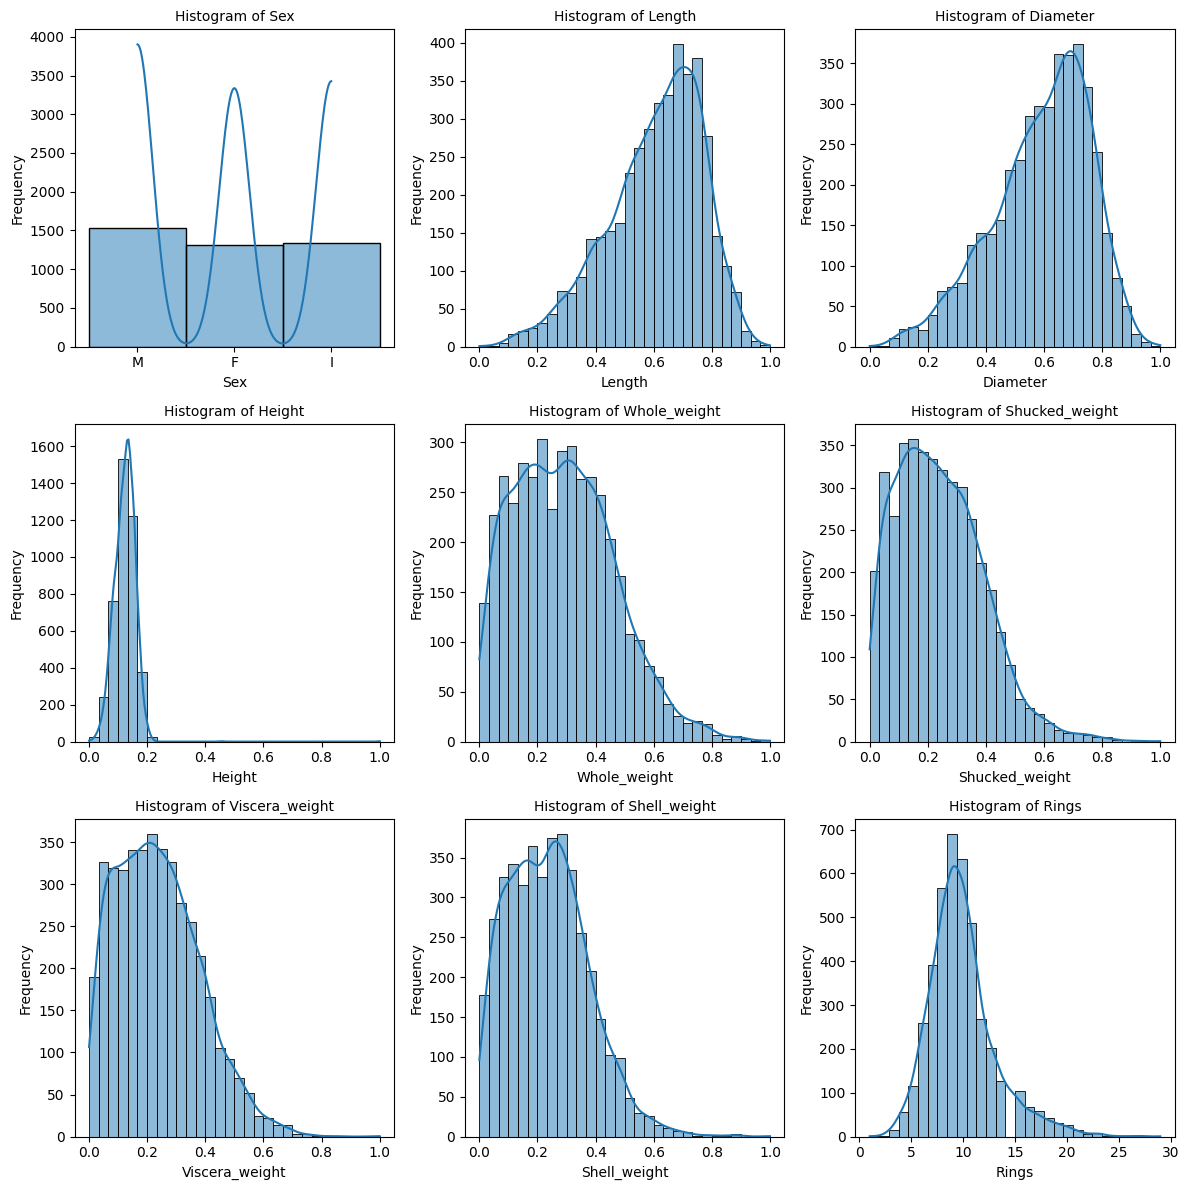

In [28]:
data_scaled = data.copy()
data_scaled[numerical] = MinMaxScaler().fit_transform(data[numerical])
plt.figure(figsize=(12, 12))
for i in range(len(data.columns)):
    col = data_scaled.columns[i]
    plt.subplot(3, 3, i+1)
    sns.histplot(data_scaled[col], kde=True, bins=30)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}', fontdict={'fontsize': 10})
plt.tight_layout()
plt.show()

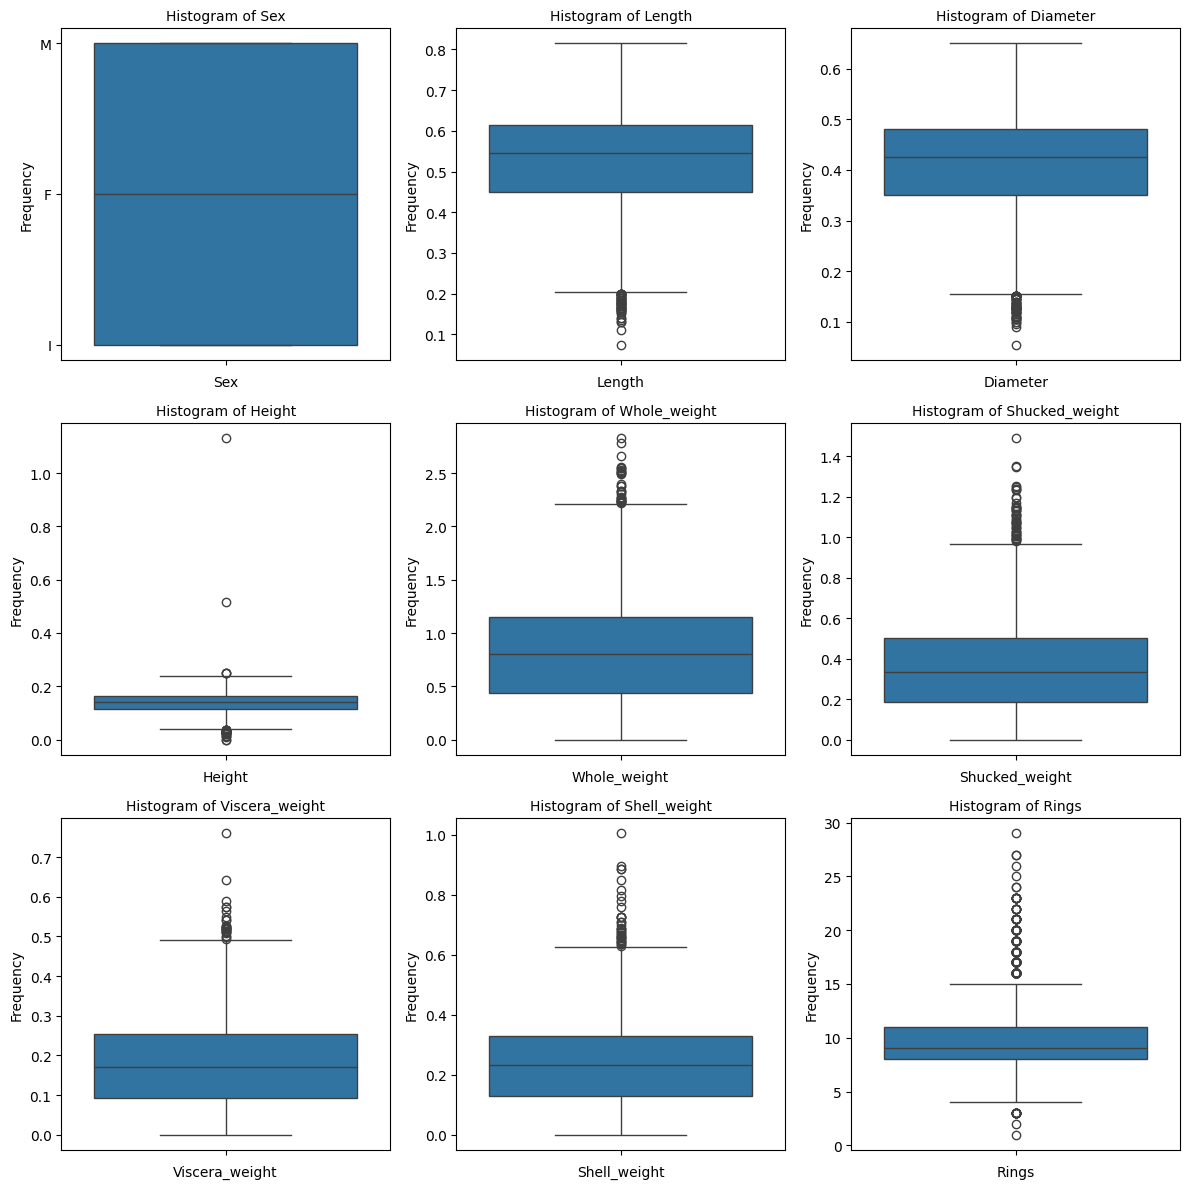

In [27]:
plt.figure(figsize=(12, 12))
for i in range(len(data.columns)):
    col = data.columns[i]
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[col])
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}', fontdict={'fontsize': 10})
plt.tight_layout()
plt.show()

In [5]:
# Map M and F
data['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [6]:
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
data['Sex'].value_counts()

Sex
0    1528
2    1342
1    1307
Name: count, dtype: int64

In [7]:
X = data

<Axes: >

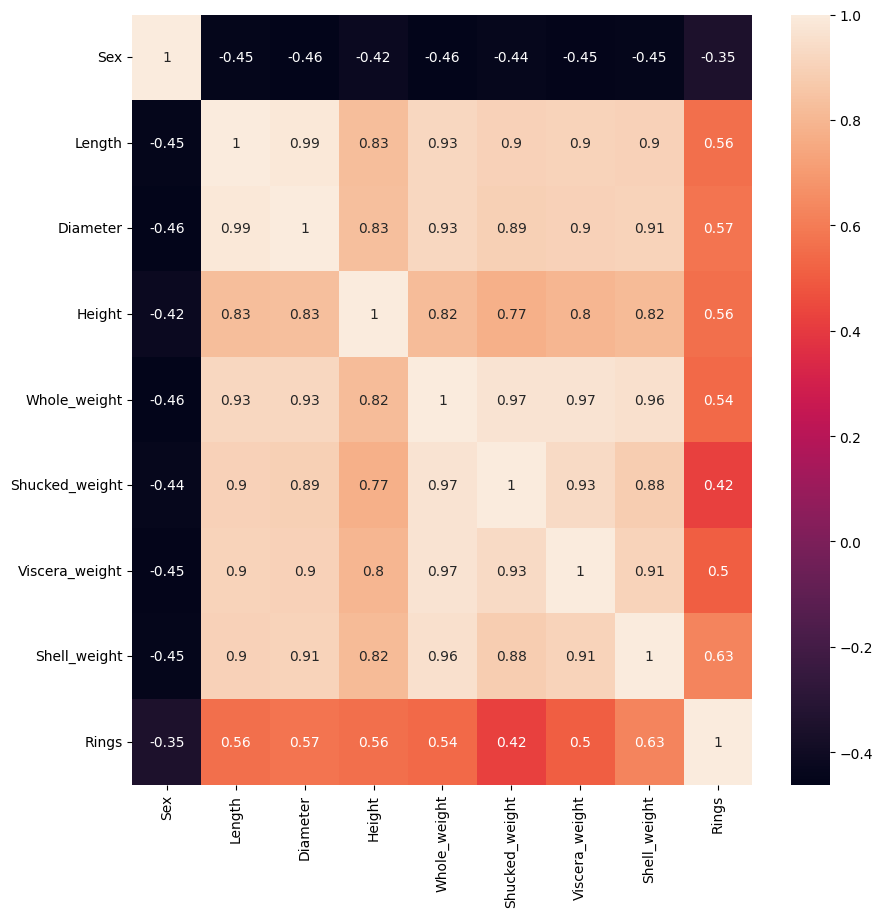

In [8]:
# Develop correlation matrix and showi it as a heatmap
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [9]:
# Pick the most correlated variables to rings
rings_corr = corr['Rings'].sort_values(ascending=False)
rings_pos, rings_neg = [rings_corr.index[1], rings_corr.values[1]], [rings_corr.index[-1], rings_corr.values[-1]]

In [10]:
print(rings_pos, rings_neg)

['Shell_weight', 0.6275740445103175] ['Sex', -0.3518215878725013]


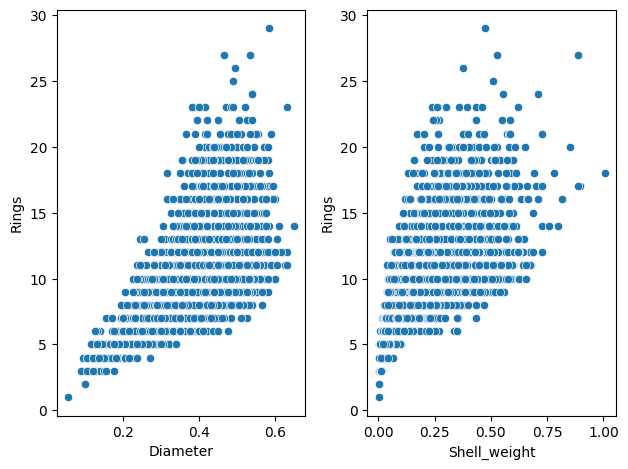

In [31]:
plt.subplot(121)
sns.scatterplot(data=data, y='Rings', x='Diameter', legend=True)
plt.subplot(122)
sns.scatterplot(data=data, y='Rings', x='Shell_weight', legend=True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Sex')

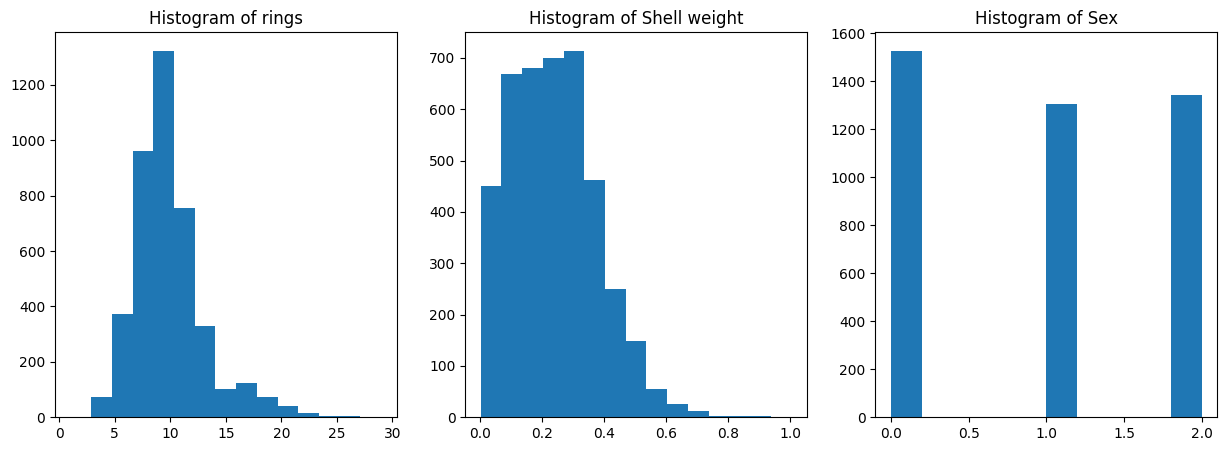

In [12]:
plt.subplots(1, 3, figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['Rings'],bins=15)
plt.title('Histogram of rings')
plt.subplot(1, 3, 2)
plt.hist(data['Shell_weight'],bins=15)
plt.title('Histogram of Shell weight')
plt.subplot(1, 3, 3)
plt.hist(data['Sex'])
plt.title('Histogram of Sex')



In [13]:
test_size = 0.4

In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# Classify rings as large(>7) or small(<=7)
y_c = data.iloc[:, -1].apply(lambda x: 1 if x > 7 else 0)
print(y_c.value_counts())

Rings
1    3338
0     839
Name: count, dtype: int64


In [15]:
def linear_regression1(X, y):
    r2_scores = []
    mse_scores = []
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse}, R2: {r2}")
    r2_scores.append(r2)
    mse_scores.append(rmse)
    plt.figure()
    plt.plot(range(50), y_test[:50], color='red', label='Actual')
    plt.plot(range(50), y_pred[:50], color='blue', label='Predicted')
    plt.legend()
    plt.title('Linear Regression Compare for 50 test data')
    return r2_scores, mse_scores

RMSE: 2.183379344624515, R2: 0.5182048268987614


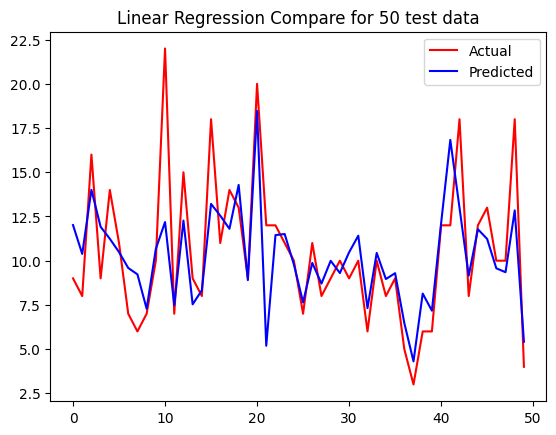

In [40]:
withoutnormlize_lr = linear_regression1(X, y)

In [41]:
def normlize_linear_regression(X, y):
    r2_scores = []
    rmse_scores = []
    stdc = MinMaxScaler()
    X = stdc.fit_transform(X)
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse}, R2: {r2}")
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    plt.figure()
    plt.plot(range(50), y_test[:50], color='red', label='Actual')
    plt.plot(range(50), y_pred[:50], color='blue', label='Predicted')
    plt.legend()
    plt.title('Linear Regression Compare for 50 test data')
    return r2_scores, rmse_scores

RMSE: 2.1833793446245178, R2: 0.5182048268987602


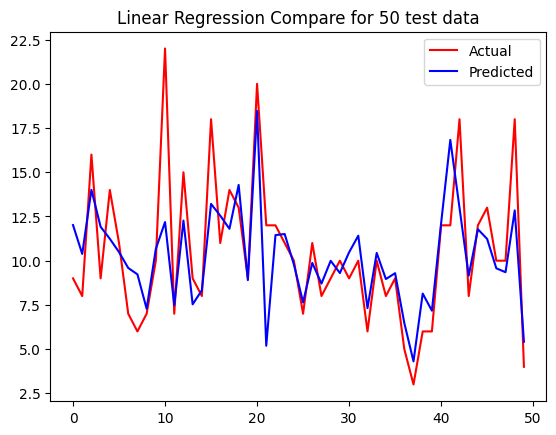

In [42]:
normlize_lr = normlize_linear_regression(X, y)

In [43]:
def linear_regression(X, y, features=['Shell_weight','Sex']):
    model = LinearRegression()
    X = X[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse}, R2: {r2}")
    plt.figure()
    plt.plot(range(50), y_test[:50], color='red', label='Actual')
    plt.plot(range(50), y_pred[:50], color='blue', label='Predicted')
    plt.legend()
    plt.title('Linear Regression Compare for 50 test data')
    return rmse, r2

RMSE: 2.428959280289504, R2: 0.40372785963807833


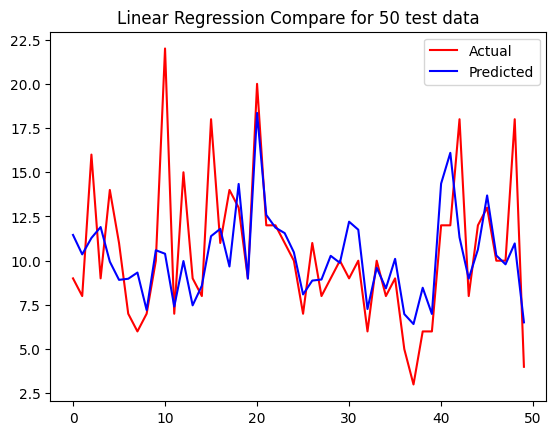

In [44]:
two_features_lr = linear_regression(X, y)

In [45]:
# Use grid searh to find the best hyperparameters
mlp = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, random_state=42, solver='sgd', activation='relu', batch_size=32)
gsd = GridSearchCV(mlp, {'learning_rate_init': [0.01, 0.05, 0.1, 0.001], 'hidden_layer_sizes':[(100,),(80,),(60,),(50,),(40,)],}, cv=5, scoring='neg_mean_squared_error', verbose=True)
gsd.fit(X, y)
print(gsd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/jenkinschen5/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [70]:
best_params = gsd.best_params_
best_params.update({'warm_start': True, 'solver': 'sgd', 'activation': 'relu', 'batch_size': 'auto'})

In [71]:
def MLP_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    mlp = MLPRegressor(**best_params)
    # training multiple eopches
    for epohch in range(100):
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        print(f"Epoch{epohch + 1}/100:  RMSE: {rmse}, R2: {r2}")
    return rmse, r2
    

In [72]:
mlp_r = MLP_regression(X, y)

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch1/100:  RMSE: 2.214125675947765, R2: 0.5045400137810119


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch2/100:  RMSE: 2.156591584329176, R2: 0.5299545403234722
Epoch3/100:  RMSE: 2.134626225717872, R2: 0.5394808107636146
Epoch4/100:  RMSE: 2.128248289165713, R2: 0.5422286213536721
Epoch5/100:  RMSE: 2.1213611664533745, R2: 0.5451865717762847
Epoch6/100:  RMSE: 2.124267092300573, R2: 0.5439396748828067
Epoch7/100:  RMSE: 2.1183157996795283, R2: 0.5464914693467311
Epoch8/100:  RMSE: 2.1219441572955278, R2: 0.5449365544740172
Epoch9/100:  RMSE: 2.1208768659759953, R2: 0.5453942131914391
Epoch10/100:  RMSE: 2.1270738332630956, R2: 0.5427337165124537
Epoch11/100:  RMSE: 2.1180272243626383, R2: 0.5466150226467161
Epoch12/100:  RMSE: 2.1171783531390496, R2: 0.5469783686246291
Epoch13/100:  RMSE: 2.1170693157388922, R2: 0.5470250298129419
Epoch14/100:  RMSE: 2.1256194224073597, R2: 0.5433588247409395
Epoch15/100:  RMSE: 2.126404745222214, R2: 0.543021344781176
Epoch16/100:  RMSE: 2.117558867494284, R2: 0.5468155134504251
Epoch17/100:  RMSE: 2.125533806060786, R2: 0.5433956094648178
Epoch18/

In [37]:
def logistic_model(X, y, model, plot=False):
    model = LogisticRegression()
    if model == 'logi':
        pass
    elif model == 'logi_norm':
        stdc = MinMaxScaler()
        X[numerical] = stdc.fit_transform(X)
    elif model == 'logi_two':
        features = ['Sex', 'Shell_weight']
        X = X[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_train_prob = model.predict_proba(X_train)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    acc_score = accuracy_score(y_test, y_pred)

    train_auc_roc = roc_auc_score(y_train, y_train_prob)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_prob)
    train_acc_score = accuracy_score(y_train, y_train_pred)
    print("Accuracy: ", acc_score, "auc_roc: ", auc_roc)
    if plot:
        c_m = confusion_matrix(y_test, y_pred)
        dis = ConfusionMatrixDisplay(confusion_matrix=c_m)
        dis.plot()
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='Test data ROC curve (area = %0.2f)' % auc_roc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 绘制参考线
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

    return(acc_score, auc_roc) ,(train_acc_score, train_auc_roc)


Accuracy:  0.8964691801316577 auc_roc:  0.9417554249348123


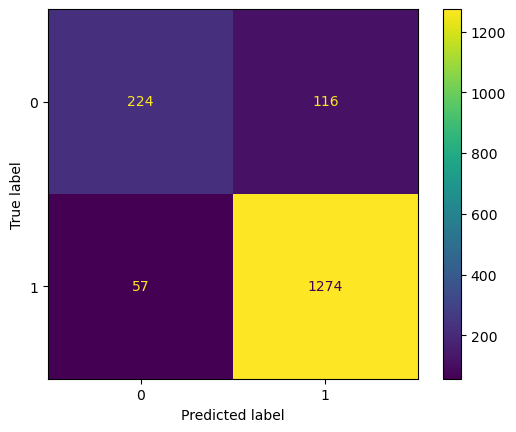

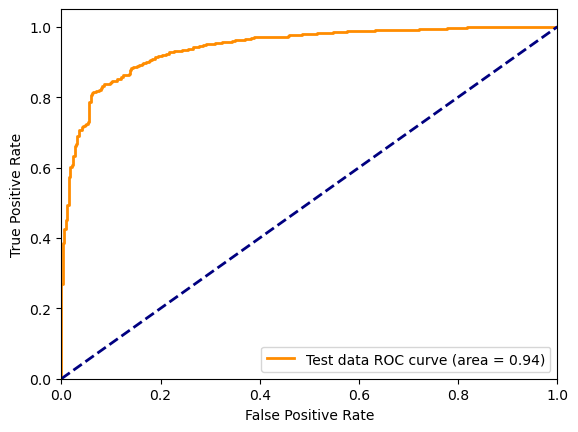

In [38]:
logi = logistic_model(X, y_c, model='logi', plot=True)

In [84]:
def MLP_classfier(X, y, plot=False):
    epoches = 50
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)
    model = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=200, solver='sgd',
                        activation='relu', warm_start=True, learning_rate_init=0.05)
    for epoch in range(epoches):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred)
        print(f"Epoch{epoch + 1}/{epoches}:  Accuracy: {acc_score}, auc_roc: {auc_roc}")
    acc_score = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_train_pred = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_prob)
    train_acc_score = accuracy_score(y_train, y_train_pred)
    train_auc_roc = roc_auc_score(y_train, y_train_pred)
    if plot:
        c_m = confusion_matrix(y_test, y_pred)
        dis = ConfusionMatrixDisplay(confusion_matrix=c_m)
        dis.plot()
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='Test data ROC curve (area = %0.2f)' % auc_roc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 绘制参考线
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
    return (acc_score, auc_roc), (train_acc_score, train_auc_roc)

Epoch1/50:  Accuracy: 0.9096349491322562, auc_roc: 0.8459141577151698
Epoch2/50:  Accuracy: 0.9078396169958108, auc_roc: 0.8117020198997187
Epoch3/50:  Accuracy: 0.9084380610412927, auc_roc: 0.849901468306406
Epoch4/50:  Accuracy: 0.9102333931777379, auc_roc: 0.852195553181791
Epoch5/50:  Accuracy: 0.9114302812687014, auc_roc: 0.8517546929172287
Epoch6/50:  Accuracy: 0.9096349491322562, auc_roc: 0.822271155537343
Epoch7/50:  Accuracy: 0.9096349491322562, auc_roc: 0.8175425551017776
Epoch8/50:  Accuracy: 0.9102333931777379, auc_roc: 0.8250061006772904
Epoch9/50:  Accuracy: 0.9114302812687014, auc_roc: 0.8434796421549895
Epoch10/50:  Accuracy: 0.9090365050867744, auc_roc: 0.8349041618129831
Epoch11/50:  Accuracy: 0.9120287253141831, auc_roc: 0.8485788875127194
Epoch12/50:  Accuracy: 0.9114302812687014, auc_roc: 0.8493903926994462
Epoch13/50:  Accuracy: 0.9084380610412927, auc_roc: 0.8108905147129919
Epoch14/50:  Accuracy: 0.9096349491322562, auc_roc: 0.8340926566262563
Epoch15/50:  Accur

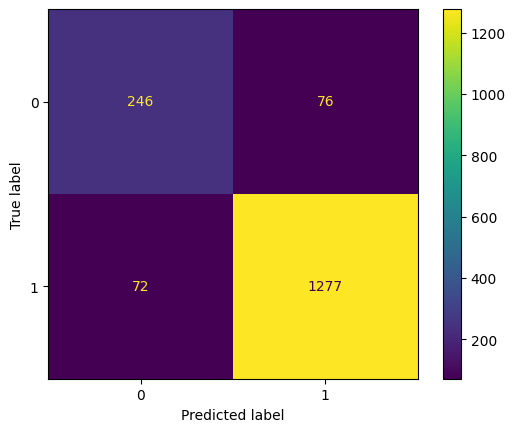

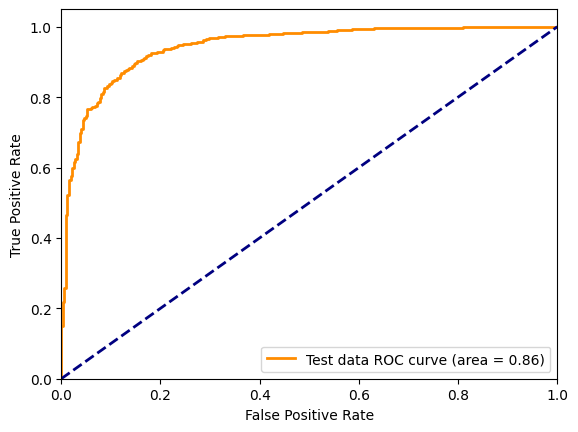

In [85]:
mlp = MLP_classfier(X, y_c, plot=True)

In [40]:
mlp[1]

(0.8858739026336792, 0.7469709948000465)